In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values.reshape(-1)
print(X.shape,Y.shape)


(3750, 1) (3750,)


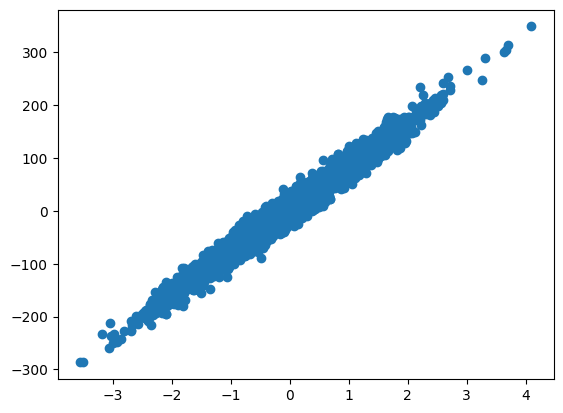

In [52]:
plt.scatter(X,Y)
plt.show()

In [53]:
def hypothesis(x,w,w0):
    ypred = []
    for r  in range(x.shape[0]):
        yp = w0
        for f in range(x.shape[1]):
            yp += w[f]*x[r,f]
        ypred.append(yp)
    return ypred

In [54]:
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],0)

[np.int64(4), np.int64(7), np.int64(10), np.int64(13)]

In [55]:
def hypothesis(x,w,w0):
    ypred = []
    for r  in range(x.shape[0]):
        yp = w0+np.sum(w*x[r])
        # for f in range(x.shape[1]):
        #     yp += w[f]*x[r,f]
        ypred.append(yp)
    return ypred

In [56]:
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],0)

[np.int64(4), np.int64(7), np.int64(10), np.int64(13)]

In [57]:
def hypothesis(x,w,w0):
    # ypred = []
    # for r  in range(x.shape[0]):
    #     yp = w0+np.sum(w*x[r])
        # for f in range(x.shape[1]):
        #     yp += w[f]*x[r,f]
        # ypred.append(yp)
    # ypred = (np.sum(x*w,axis=1))+w0
    # return ypred
    return x@w+w0

In [58]:
hypothesis(np.array([[1,2],[2,3],[3,4],[4,5]]),[2,1],0)

array([ 4,  7, 10, 13])

In [59]:
# loss hum mse use kr rhe hai
w = [2]
w0 = 1

In [60]:
def loss(x,w,w0,y):
    ypred = hypothesis(x,w,w0)
    return np.mean((ypred-y)**2)

In [61]:
loss(X,w,w0,Y)

np.float64(6262.785551671269)

In [89]:
def gradientDescent(X,Y,lr = 0.01, epochs = 100):
    w = np.random.random(size=(X.shape[1],))
    w0 = 1
    for k in range(epochs):
        ypred = hypothesis(X,w,w0)
        grads = []
        for j in range(X.shape[1]):
            g = 0
            for i in range(X.shape[0]):
                g+= ypred[i]-Y[i]*X[i,j]
            g/=X.shape[0]

            grads.append(g)
        w = w-lr*np.array(grads)
        w0 = w0-lr*np.mean(ypred-Y)
    return w,w0
    

In [90]:
w,w0 = gradientDescent(X,Y,lr = 0.05,epochs = 10000)

In [91]:
w

array([40821.33663128])

In [92]:
w0

np.float64(1540.4265770043353)

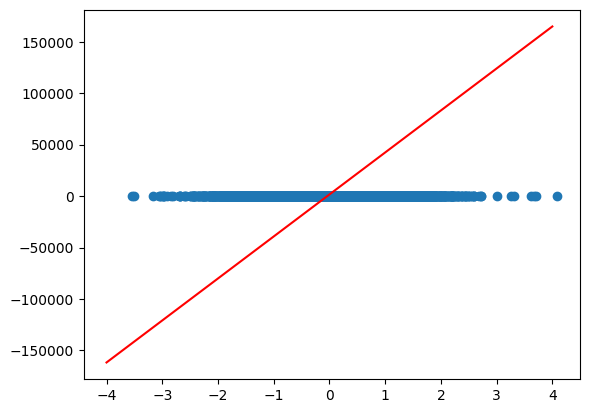

In [93]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,Y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

In [94]:
# optimization

In [95]:
def gradientDescent(X,Y,lr = 0.01, epochs = 100):
    w = np.random.random(size=(X.shape[1],))
    w0 = 1
    for k in range(epochs):
        ypred = hypothesis(X,w,w0)
        grads = []
        for j in range(X.shape[1]):
            # g = 0
            # for i in range(X.shape[0]):
            #     g+= ypred[i]-Y[i]*X[i,j]
            # g/=X.shape[0]

            g = np.mean((ypred-Y)*X[:,j])
            grads.append(g)
        w = w-lr*np.array(grads)
        w0 = w0-lr*np.mean(ypred-Y)
    return w,w0
    

In [96]:
w,w0 = gradientDescent(X,Y,lr = 0.05,epochs = 100)

In [97]:
w

array([80.01885384])

In [98]:
w0

np.float64(3.612895406553483)

In [101]:
def gradientDescent(X,Y,lr = 0.01, epochs = 100):
    w = np.random.random(size=(X.shape[1],))
    w0 = 1
    for k in range(epochs):
        ypred = hypothesis(X,w,w0)
        grads = []
        # for j in range(X.shape[1]):
        #     # g = 0
        #     # for i in range(X.shape[0]):
        #     #     g+= ypred[i]-Y[i]*X[i,j]
        #     # g/=X.shape[0]

        #     g = np.mean((ypred-Y)*X[:,j])
        #     grads.append(g)
        grads = (ypred-Y)@X/X.shape[0]
        w = w-lr*np.array(grads)
        w0 = w0-lr*np.mean(ypred-Y)
    return w,w0
    

In [102]:
w,w0 = gradientDescent(X,Y,lr = 0.05,epochs = 100)

In [103]:
w

array([80.02177236])

In [104]:
w0

np.float64(3.6134473867958614)

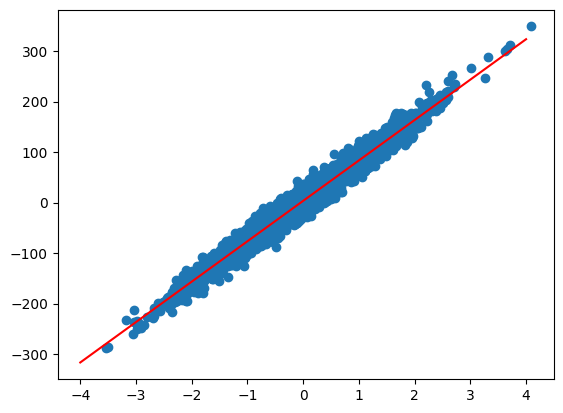

In [107]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,Y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

In [113]:
class LinearRegression:
    def __init__(self,lr = 0.01):
        self.lr = lr
    def fit(self,X,y,epochs = 100):
        self.w, self.w0 = self.gradientDescent(X,y,self.lr,epochs)

    def hypothesis(self,x,w,w0):
        return w.dot(x.T) + w0

    def loss(self,x,w,w0,y):
        ypred = self.hypothesis(x,w,w0)
        return np.mean((ypred-y)**2)

    def predict(self,X):
        return self.hypothesis(X,self.w,self.w0)

    def gradientDescent(self,X,y,lr = 0.01,epochs = 100):
        w = np.zeros(shape=(X.shape[1],))
        w0 = 1
        self.loss_e = [self.loss(X,w,w0,y)]
        for e in range(epochs):
            ypred = self.hypothesis(X,w,w0)
            
            # i = np.random.randint(X.shape[0])
            # grads = (ypred[i]-y[i])*X[i]
            
            grads = grads = (ypred-y)@X/X.shape[0]
            w = w - lr*grads
            w0 = w0 - lr*np.mean(ypred-y)

            self.loss_e.append(self.loss(X,w,w0,y))
            
        return w,w0

In [114]:
clf = LinearRegression()
clf.fit(X,Y,epochs=500)


In [115]:
clf.w


array([79.96095245])

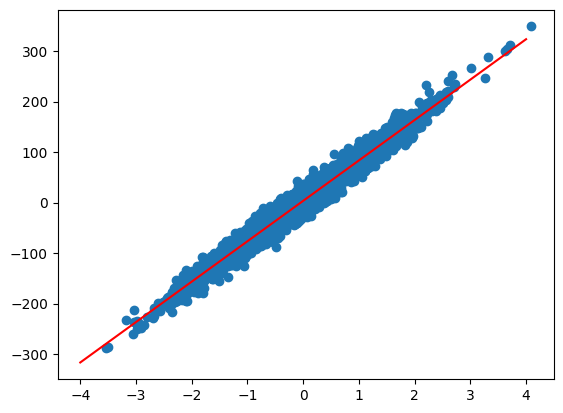

In [116]:
x = np.linspace(-4,4,1000).reshape((-1,1))
plt.scatter(X,Y)
plt.plot(x,hypothesis(x,w,w0),c='r')
plt.show()

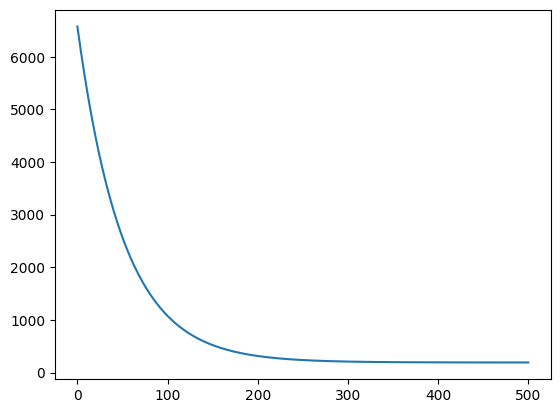

In [117]:
plt.plot(clf.loss_e)
plt.show()

In [118]:
clf.loss_e

[np.float64(6575.982314525905),
 np.float64(6450.878380324976),
 np.float64(6328.2291810676),
 np.float64(6207.9864807413105),
 np.float64(6090.102992576523),
 np.float64(5974.5323603385605),
 np.float64(5861.229139988935),
 np.float64(5750.148781708586),
 np.float64(5641.247612275908),
 np.float64(5534.482817792578),
 np.float64(5429.812426750271),
 np.float64(5327.195293431564),
 np.float64(5226.591081638406),
 np.float64(5127.960248741683),
 np.float64(5031.264030045517),
 np.float64(4936.46442346011),
 np.float64(4843.524174477021),
 np.float64(4752.406761440875),
 np.float64(4663.076381111694),
 np.float64(4575.497934512073),
 np.float64(4489.637013053571),
 np.float64(4405.4598849368285),
 np.float64(4322.933481819982),
 np.float64(4242.025385750064),
 np.float64(4162.703816352225),
 np.float64(4084.937618271652),
 np.float64(4008.6962488632216),
 np.float64(3933.949766123957),
 np.float64(3860.668816863527),
 np.float64(3788.8246251080673),
 np.float64(3718.3889807327137),
 np.f

In [124]:
Xnew = np.stack([X[:,0],np.ones(X.shape[0])],axis=1)
Xnew

array([[-0.28930742,  1.        ],
       [-0.58880963,  1.        ],
       [ 1.02750749,  1.        ],
       ...,
       [-0.30516366,  1.        ],
       [ 1.67583291,  1.        ],
       [-0.49175724,  1.        ]], shape=(3750, 2))

In [119]:
# ols


In [125]:
w = np.linalg.inv(Xnew.T@Xnew)@Xnew.T@Y

In [126]:
w

array([80.54363185,  3.72798828])